<a href="https://colab.research.google.com/github/AminHasibul/Conspiracy_Againtst_Covid_Vaccines_detection/blob/main/Bert_Covid_Cons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip 

In [ ]:
!pip3 install virtualenv


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 28.9 MB/s 
     |████████████████████████████████| 468 kB 73.4 MB/s 


In [ ]:
!virtualenv myenv


created virtual environment CPython3.7.14.final.0-64 in 513ms
  creator CPython3Posix(dest=/content/myenv, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: pip==22.2.2, setuptools==65.3.0, wheel==0.37.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [ ]:
!source /content/myenv/bin/activate myenv; 

In [ ]:
!pip install tensorflow==1.14; 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109.3 MB 66 kB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
     |████████████████████████████████| 3.1 MB 64.5 MB/s 
     |████████████████████████████████| 488 kB 81.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
ERROR: pip's dependency resolver does not currently ta

In [ ]:
!pip install bert-serving-server; 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 290 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=76c87bb9ac7a276b0bc95e0993cc1aebb685c3f56c69082250517579e5dfb2bd
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
!unzip uncased_L-12_H-768_A-12.zip

Archive:  uncased_L-12_H-768_A-12.zip
   creating: uncased_L-12_H-768_A-12/
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.meta  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.data-00000-of-00001  
  inflating: uncased_L-12_H-768_A-12/vocab.txt  
  inflating: uncased_L-12_H-768_A-12/bert_model.ckpt.index  
  inflating: uncased_L-12_H-768_A-12/bert_config.json  


In [ ]:
!nohup bert-serving-start -max_seq_len=128 -model_dir=uncased_L-12_H-768_A-12 > out.file 2>&1 &

In [ ]:
!pip3 install -U bert-serving-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from bert_serving.client import BertClient


In [ ]:
bc = BertClient()

In [7]:
token_list = []

In [1]:
from nltk.tokenize import word_tokenize
from numpy import savetxt
from gensim.models import KeyedVectors
import nltk
from nltk.stem.porter import PorterStemmer
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


In [2]:

# If not previously performed:
# nltk.download('stopwords')
#from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
stemming = PorterStemmer()
stops = set(stopwords.words("english"))
def apply_cleaning_function_to_list(X):
    cleaned_X = []
    for element in X:
        cleaned_X.append(clean_text(element))
    return cleaned_X


def clean_text(raw_text):
    """This function works on a raw text string, and:
        1) changes to lower case
        2) tokenizes (breaks down into words
        3) removes punctuation and non-word text
        4) finds word stems
        5) removes stop words
        6) rejoins meaningful stem words"""
    
    review = re.sub('[^a-zA-Z]', ' ', str(raw_text))
    # Convert to lower case
    text = raw_text.lower()
    
    # Tokenize
    tokens = nltk.word_tokenize(text)
    
    # Keep only words (removes punctuation + numbers)
    # use .isalnum to keep also numbers
    token_words = [w for w in tokens if w.isalpha()]
   
    # Stemming
    # stemmed_words = [stemming.stem(w) for w in token_words]
    
    # Remove stop words
    meaningful_words = [w for w in token_words if not w in stops]
    
    token_list.append(meaningful_words)
    # Rejoin meaningful stemmed words
    joined_words = ( " ".join(meaningful_words))
    
    # Return cleaned data
    return joined_words



In [9]:

datas=pd.read_csv('finaldataset.csv',encoding= 'unicode_escape')

filter_data = datas[0:609] 
dataf=list(filter_data['comments'])
y=list(filter_data['label'])
y = np.array(y).astype(int)
print(y)

# Get text to clean
text_to_clean = dataf

review = re.sub('[^a-zA-Z]', ' ', str(text_to_clean))
# Clean text
cleaned_text = apply_cleaning_function_to_list(text_to_clean)


text = cleaned_text

print(text_to_clean)


[1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0
 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0
 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 1 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0
 0 0 0 1 1 0 1 1 1 0 0 0 

In [10]:
tokenized_text = nltk.word_tokenize(str(text))
# review = re.sub('[^a-zA-Z,]', ' ', str(tokenized_text))
print (tokenized_text)
print (review)
word_dis = nltk.FreqDist(tokenized_text)

print(word_dis)

['[', "'vaccine", 'failure', "'", ',', "'vaccine", 'trails', 'total', 'conspiracy', "'", ',', "'mom", 'tested', 'covid', 'positive', 'getting', 'vaccinated', "'", ',', "'friend", 'shingles', 'outbreak', 'getting', 'covid', 'knew', 'two', 'people', 'facebook', 'page', 'report', "'", ',', "'earth", 'would', 'need', 'bribe', 'poison', "'", ',', "'vaccine", 'doesnt', 'played', 'pushing', 'scam', 'dont', 'care', 'health', 'power', 'resist', 'fight', 'back', "'", ',', "'imagine", 'gullible', 'enough', 'get', 'experimental', 'trial', 'tested', 'shots', 'find', 'dont', 'work', 'need', 'booster', 'shots', 'years', 'come', "'", ',', "'vaccine", 'junkies', 'unite', "'", ',', "'great", "'", ',', "'thats", 'excellent', 'news', 'vaccine', 'hope', "'", ',', "'fantastic", 'hope', "'", ',', "'great", 'news', 'take', 'vaccine', 'soon', 'market', "'", ',', "'none", 'dying', 'thats', 'good', "'", ',', "'duh", 'vax', 'prevent', 'covid', "'", ',', "'vaccination", 'seems', 'like', 'dead', 'infringes', "'", '

In [11]:
import matplotlib.pyplot as plt
import seaborn as sb

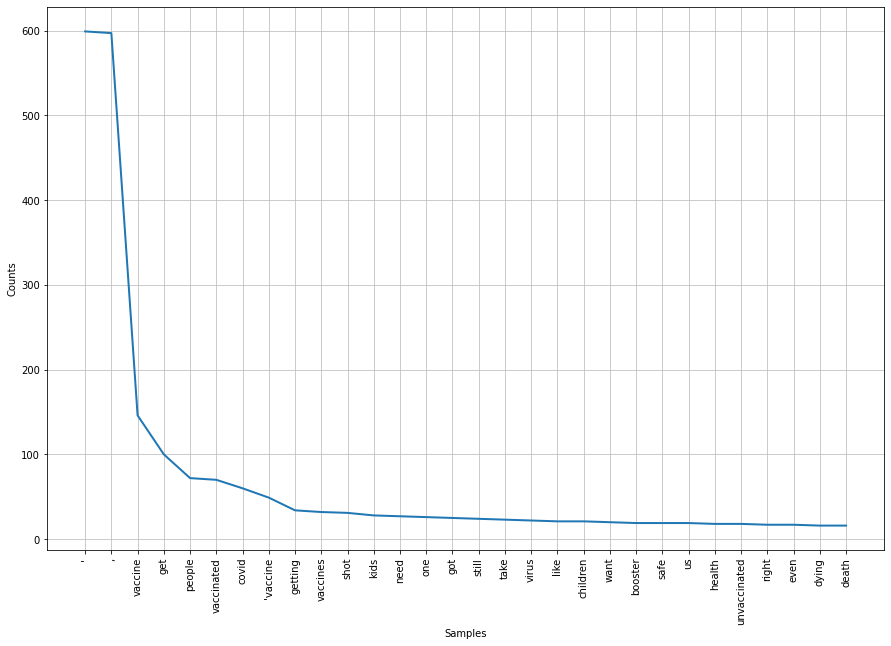

Text(0.5, 1.0, 'Word Distribution')

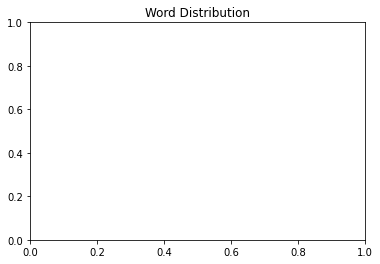

In [15]:
plt.figure(figsize=(15,10))
ax = word_dis.plot(30,cumulative = False)

ax.figure.savefig('hist')
plt.title('Word Distribution')



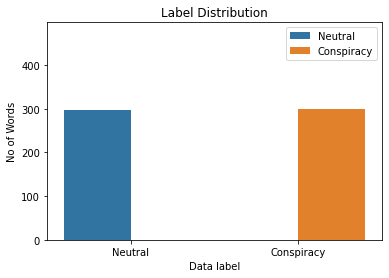

In [ ]:
import seaborn as sb
plt.figure()
ax = sb.countplot(x="label",hue="label", data=datas)

plt.ylabel("No of Words")
plt.xlabel("Data label")
plt.ylim(0,len(datas)-100)
plt.legend(['Neutral', 'Conspiracy']);
plt.xticks([0,1],['Neutral', 'Conspiracy'])

plt.title('Label Distribution')

plt.savefig('label')


In [ ]:
print(len(text))

598


In [ ]:
X=[]
for j in range(0,len(text)):
     #print(j)
     tokens = word_tokenize(text[j])
     words = [word for word in tokens if word.isalpha()]

     

     
     sum=0
     for i in range(0,len(words)):
        try:
           sum=sum+bc.encode([words[i]])
           print("sum",sum)
        except:
           k=0
           print("sum",sum)
           
     X.append(sum)



Streaming output truncated to the last 5000 lines.
   2.76261836e-01  1.84331119e+00 -1.80596256e+00  3.34800506e+00
  -6.59108520e-01  6.24948025e-01  1.20309079e+00 -9.08661842e-01
  -8.14107478e-01 -2.75468826e+00 -1.06988406e+00  9.78318334e-01
  -1.39736164e+00  1.49202394e+00  4.53821719e-01 -3.22738600e+00
  -1.83536625e+00 -1.94383994e-01 -2.59648371e+00 -1.52163774e-01
  -7.81387746e-01 -1.86302257e+00  7.73626983e-01 -1.09439135e+00
   5.34798265e-01  8.62035155e-01  5.15813529e-01 -5.59220791e-01
   1.00911307e+00 -2.21043587e+00 -1.28016853e+00  1.73171020e+00]]
sum [[-4.88486290e+00 -1.67522681e+00 -2.17337155e+00 -3.10972667e+00
   1.15635231e-01 -1.18645859e+00  5.50781310e-01  2.07712650e+00
  -1.79055941e+00 -4.59392595e+00 -2.27981162e+00  1.85935080e+00
   2.29816556e+00  6.77788258e-01 -1.07107043e+00 -1.79628894e-01
  -1.46429360e+00  1.09128380e+00  1.37659717e+00  9.88745570e-01
  -2.97897482e+00  8.22500110e-01 -2.79449415e+00 -1.75311041e+00
   1.23215914e+00  

In [ ]:
X = np.array(X).astype(float)

print(len(X))
X=np.reshape(X,(len(X),768))
savetxt('BERT-Score.csv', X, delimiter=',')
print(X.shape)
kf=KFold(n_splits=10, random_state=25, shuffle=True)



598
(598, 768)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
acc=[]
prec=[]
reca=[]
f=[]
cm =[]


for train_index, test_index in kf.split(X):
        
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train)
        # clf= LogisticRegression(C = 1,max_iter=1000,random_state = 0)
        # clf.fit(X_train, y_train)
        clf= XGBClassifier()
        clf.fit(X_train, y_train)
        
        # clf= KNeighborsClassifier()
        # clf.fit(X_train, y_train)
        
        # clf= SVC()
        # clf.fit(X_train, y_train)
        
        clf= GaussianNB()
        clf.fit(X_train, y_train)

        y_pred = clf.predict( X_test)
        acc.append(accuracy_score(y_test,  y_pred))
        reca.append(recall_score(y_test,  y_pred,
                                            average ='micro'))
        prec.append(precision_score(y_test,  y_pred,average ='macro'))
        f.append(f1_score(y_test,  y_pred,
                                          average ='micro'))

 
cm.append(metrics.confusion_matrix(y_test, y_pred))


print("Confusion Metrics:" + str(cm))
 
print("accuracy : "+ str(np.mean(acc)))
print("recall : "+ str(np.mean(reca)))
print("precision : "+ str(np.mean(prec)))
print("f1 score : " + str(np.mean(f)))

Confusion Metrics:[array([[ 3, 25],
       [ 5, 26]])]
accuracy : 0.5116666666666667
recall : 0.5116666666666667
precision : 0.5203924282223239
f1 score : 0.5116666666666667
